In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import plotly.express as px
from lmfit.models import LinearModel
mod = LinearModel()

In [2]:
data = Path(r'C:/Users/Mailson/DesktopC:\Users\MailsonCompanhiaMB.csv')

In [3]:
data = pd.read_csv(data)
data

,funcionario,estado_civil,instrucao,nfilhos,salario,idade_anos,idade_meses,regiao
0,1,solteiro,ensino_fundamental,NaN,4.00,26,3,interior
1,2,casado,ensino_fundamental,1.0,4.56,32,10,capital
2,3,casado,ensino_fundamental,2.0,5.25,36,5,capital
3,4,solteiro,ensino_medio,NaN,5.73,20,10,outro
4,5,solteiro,ensino_fundamental,NaN,6.26,40,7,outro
5,6,casado,ensino_fundamental,0.0,6.66,28,0,interior
6,7,solteiro,ensino_fundamental,NaN,6.86,41,0,interior
7,8,solteiro,ensino_fundamental,NaN,7.39,43,4,capital
8,9,casado,ensino_medio,1.0,7.59,34,10,capital
9,10,solteiro,ensino_medio,NaN,7.44,23,6,outro


A idade em anos está associadas de forma linear com o salário?

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 36
    # variables        = 2
    chi-square         = 639.316377
    reduced chi-square = 18.8034228
    Akaike info crit   = 107.567698
    Bayesian info crit = 110.734736
    R-squared          = 0.13203207
[[Variables]]
    slope:      0.24741044 +/- 0.10879043 (43.97%) (init = 1)
    intercept:  2.56594458 +/- 3.83112073 (149.31%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9820


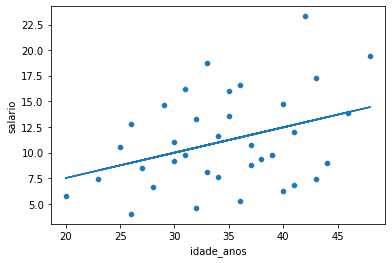

In [4]:
fit = mod.fit(data.salario, x = data.idade_anos)
sns.scatterplot(x = data.idade_anos , y = data.salario)
plt.plot(data.idade_anos, fit.best_fit)
print(fit.fit_report(show_correl = True))

In [5]:
from scipy import stats
stats.pearsonr(x = data.idade_anos , y = data.salario)[0]

0.36336218090815786

Note que 0.36 é uma correlação positiva e fraca.

In [6]:
import urllib.request
data2 = urllib.request.urlopen("http://wiki.icmc.usp.br/images/0/0f/Acuidade.txt")

data2 = [line.decode('utf-8').replace('\r', '').replace('\n','').split('\t') for line in data2]
data2 = [[int(j) if j.isnumeric() else j for j in i] for i in data2]
columns = data2[0]
data2 = [[data2[i][j] for i in range(1,len(data2))] for j in range(len(data2[0]))]
data2 = {columns:data_line for columns, data_line in zip(columns,data2)}
data2 = pd.DataFrame(data2)

In [7]:
data2

,ind,tempo,sexo,idade,acuidade
0,1,96,M,20,90
1,2,92,F,20,100
2,3,106,M,20,80
3,4,100,F,20,90
4,5,98,F,25,100
5,6,104,M,25,90
6,7,110,M,25,80
7,8,101,F,25,90
8,9,116,F,30,70
9,10,106,M,30,90


Se aumentamos a idade, aumentamos o tempo de reação?

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 20
    # variables        = 2
    chi-square         = 563.000000
    reduced chi-square = 31.2777778
    Akaike info crit   = 70.7509471
    Bayesian info crit = 72.7424116
    R-squared          = 0.58994902
[[Variables]]
    slope:      0.90000000 +/- 0.17685525 (19.65%) (init = 1)
    intercept:  80.5000000 +/- 5.45104475 (6.77%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9733


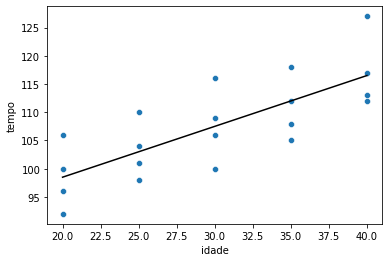

In [8]:
fit2 = mod.fit(data2.tempo, x=data2.idade)
sns.scatterplot(y= data2.tempo, x = data2.idade)
plt.plot(data2.idade, fit2.best_fit, color = 'k')
print(fit2.fit_report())

In [9]:
stats.pearsonr(data2.tempo, data2.idade)[0]

0.7680813868019709

A correlação é positiva e moderada-forte

In [10]:
data3 = Path(r'C:/Users/Mailson/Downloads/dataset-90380.csv')
data3 = pd.read_csv(data3)

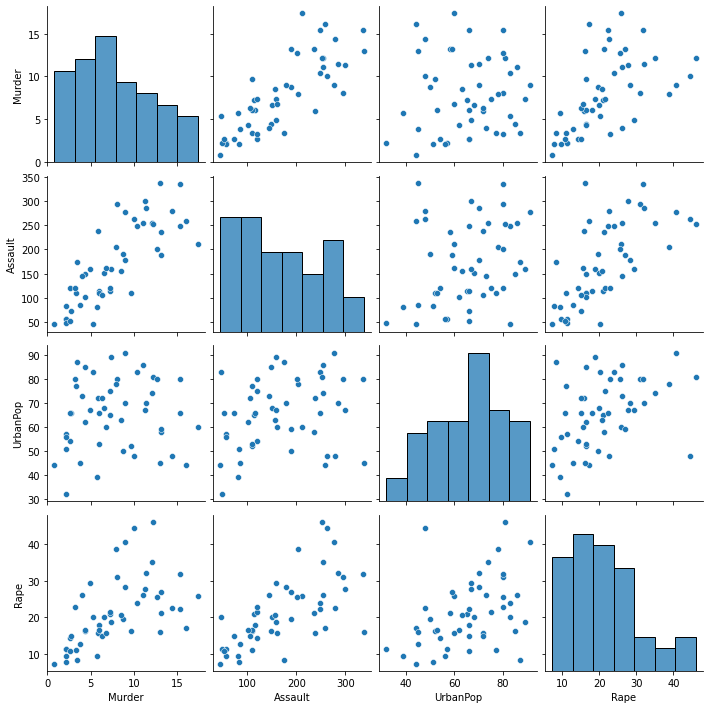

In [11]:
sns.pairplot(data3)

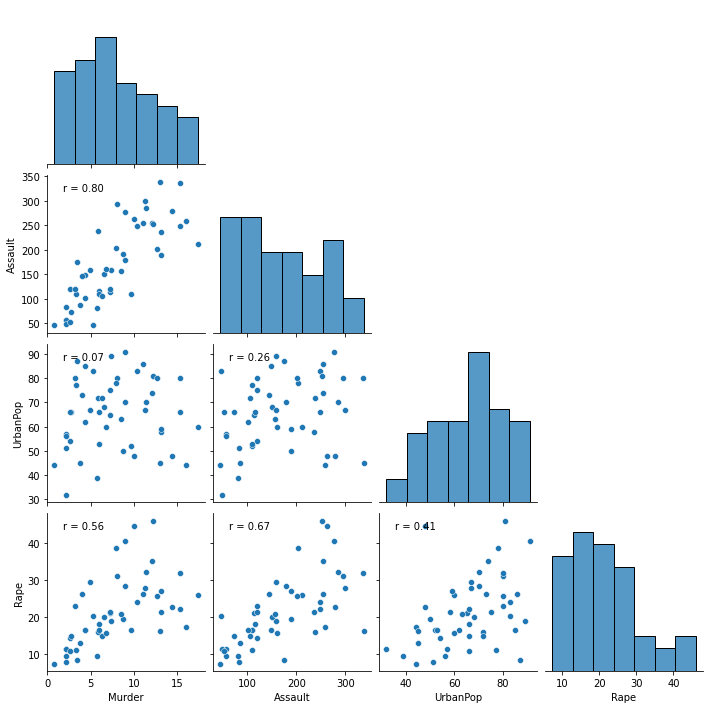

In [12]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(data3, corner = True)
g.map_lower(corrfunc)

<AxesSubplot:>

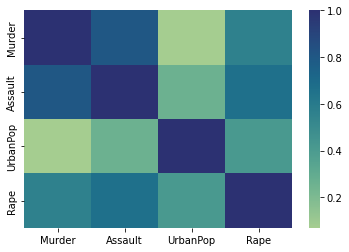

In [13]:
sns.heatmap(data3.corr(),cmap="crest")

In [21]:
data3 = Path(r'C:/Users/Mailson/Desktop/Computação/Visualização de dados/VED-main/Dados/Housing_Dec2010.csv')

In [22]:
data3 = pd.read_csv(data3, sep = ';')
data3.dropna(inplace = True)

In [23]:
data3

,countryarea,year,total,urban,rural
1,Austria,1997,0.7,0.7,0.7
2,Azerbaijan,1998,2.1,1.9,2.3
3,Bahamas,1990,1.3,1.3,1.1
7,Brazil,1998,0.7,0.7,0.8
8,Bulgaria,1992,1.0,1.2,0.8
9,Cameroon,1976,1.2,1.2,1.3
10,Canada,1996,0.5,0.5,0.5
12,Colombia,1993,1.4,1.3,1.7
13,Costa_Rica,1997,0.9,0.8,1.0
15,Cuba,1981,1.0,1.0,1.0


In [35]:
correl = np.corrcoef(x = data3.year, y = data3.total)[0,1]
correl

-0.09866102306798032

A correlação entre a média de moradores e a idade é fraca

Text(0.02, 0.95, 'correlação = -0.099')

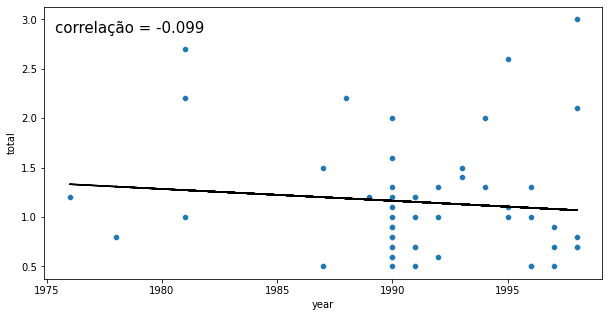

In [47]:
fit3 = mod.fit(data3.total, x = data3.year)
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(x = data3.year, y= data3.total)
plt.plot(data3.year, fit3.best_fit, color = 'k')
plt.text(.02, .95, f'correlação = {correl:.3f}', ha='left', va='top', fontsize = 15, transform=ax.transAxes)

In [62]:
print('number of funciton efvals', fit3.nfev)
print('number of data points', fit3.result.ndata)
print('number of variables', fit3.nvarys)
print('chi-square',fit3.chisqr) 
print('reduced chi-square', fit3.redchi)
print('Akaide informational criterion', fit3.aic)
print('Bayesian informational criterion', fit3.bic)
print('R-square', fit3.rsquared)

number of funciton efvals 7
number of data points 52
number of variables 2
chi-square 18.587292867435174
reduced chi-square 0.37174585734870347
Akaide informational criterion -49.49580862629406
Bayesian informational criterion -45.5933211891312
R-square 0.009733997472819889


0.098661023067977